<a href="https://www.kaggle.com/code/zeeshanahmadyar/student-performance-factors-linear-regression?scriptVersionId=282592757" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [2]:
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

In [3]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [4]:
df.shape

(6607, 20)

# **Fill Missing Values**

In [5]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [6]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(6607, 20)

# **Now we detect and remove outliers from data**

In [9]:
df.columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


<Axes: >

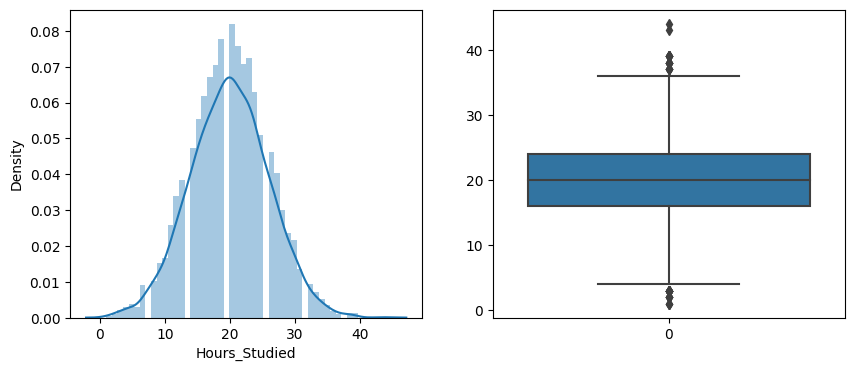

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Hours_Studied'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Hours_Studied'])

<Axes: >

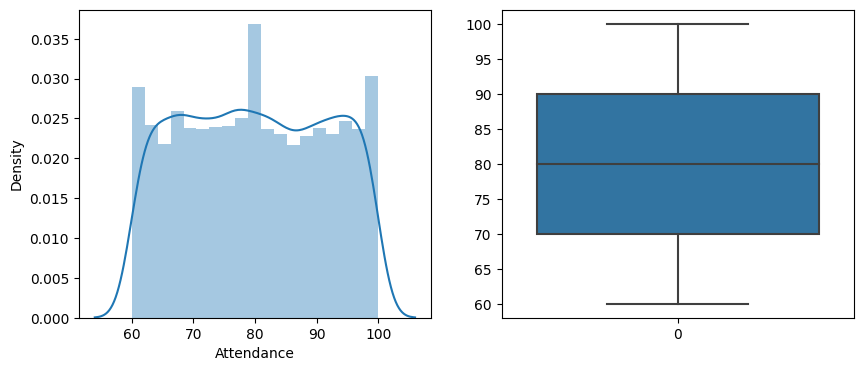

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Attendance'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Attendance'])

<Axes: >

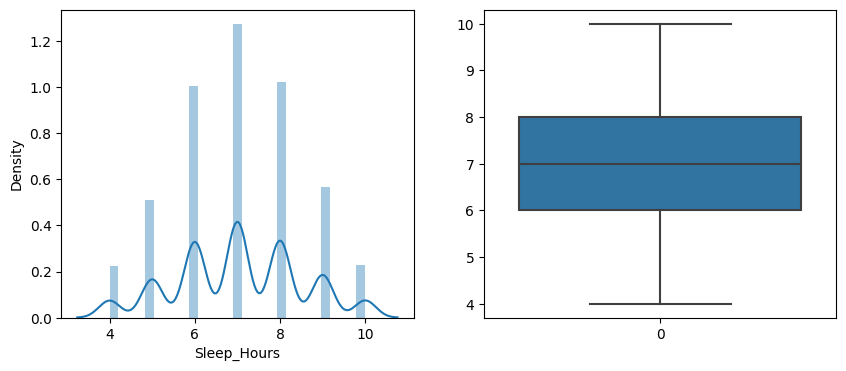

In [12]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Sleep_Hours'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Sleep_Hours'])

<Axes: >

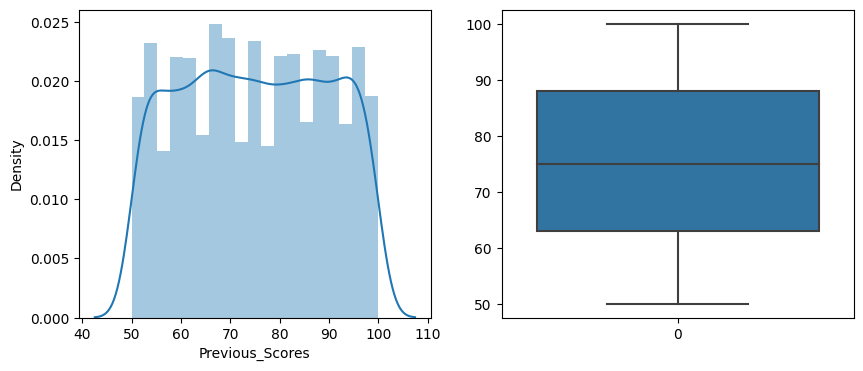

In [13]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Previous_Scores'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Previous_Scores'])

<Axes: >

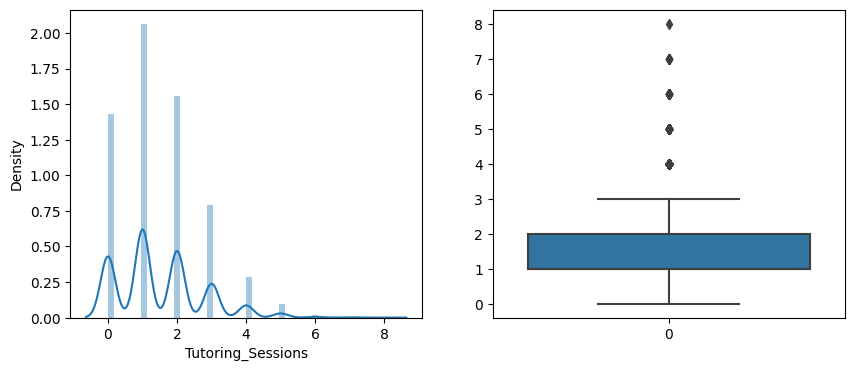

In [14]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Tutoring_Sessions'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Tutoring_Sessions'])

<Axes: >

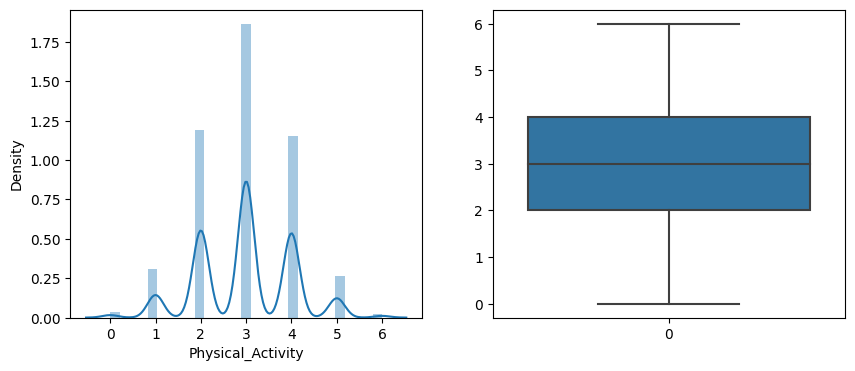

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Physical_Activity'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Physical_Activity'])

<Axes: >

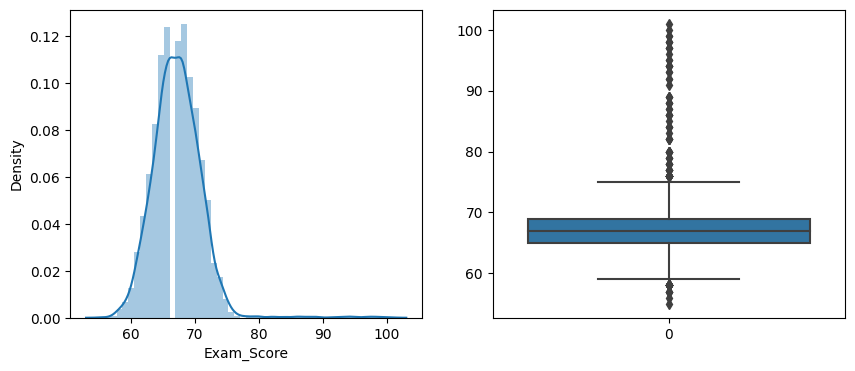

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Exam_Score'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Exam_Score'])

In [17]:
# df['Hours_Studied_zscore'] = (df['Hours_Studied'] - df['Hours_Studied'].mean()) / df['Hours_Studied'].std()

upper_limit = df['Hours_Studied'].mean() + 3 * df['Hours_Studied'].std()
lower_limit = df['Hours_Studied'].mean() - 3 * df['Hours_Studied'].std()

In [18]:
# df[(df['Hours_Studied_zscore'] > 3) | (df['Hours_Studied_zscore'] < -3)]

# Capping
df['Hours_Studied'] = np.where(
    df['Hours_Studied'] > upper_limit,
    upper_limit,
    np.where(
        df['Hours_Studied'] < lower_limit,
        lower_limit,
        df['Hours_Studied']
    )
)

**Persontile Method**

In [19]:
# make upper and lower limit 
upper_limit = df['Tutoring_Sessions'].quantile(0.99)
lower_limit = df['Tutoring_Sessions'].quantile(0.01)
# triming
df = df[(df['Tutoring_Sessions'] <= upper_limit) & (df['Tutoring_Sessions'] >= lower_limit)]

**Removing error from Exam_Score**

In [20]:
# Exam_Score
df['Exam_Score'] = (df['Exam_Score'] - df['Exam_Score'].mean()) / df['Exam_Score'].std()
df = df[(df['Exam_Score'] < 3) & (df['Exam_Score'] > -3)]

# **Encoding Categorical Features**

In [21]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


**We are applying Ordinal Encoding on the data who have an Order**

In [22]:
encoder = OrdinalEncoder()
df[['Motivation_Level', 'Teacher_Quality', 'School_Type', 'Parental_Education_Level']] = encoder.fit_transform(
    df[['Motivation_Level', 'Teacher_Quality', 'School_Type', 'Parental_Education_Level']]
)

In [23]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,Low,High,No,7,73,1.0,Yes,0,Low,2.0,1.0,Positive,3,No,1.0,Near,Male,-0.056791
1,19.0,64,Low,Medium,No,8,59,1.0,Yes,2,Medium,2.0,1.0,Negative,4,No,0.0,Moderate,Female,-1.602238
2,24.0,98,Medium,Medium,Yes,7,91,2.0,Yes,2,Medium,2.0,1.0,Neutral,4,No,2.0,Near,Male,1.746231
3,29.0,89,Low,Medium,Yes,8,98,2.0,Yes,1,Medium,2.0,1.0,Negative,4,No,1.0,Moderate,Male,0.973507
4,19.0,92,Medium,Medium,Yes,6,65,2.0,Yes,3,Medium,0.0,1.0,Neutral,4,No,0.0,Near,Female,0.715933
5,19.0,88,Medium,Medium,Yes,8,89,2.0,Yes,3,Medium,2.0,1.0,Positive,3,No,2.0,Near,Male,0.973507
6,29.0,84,Medium,Low,Yes,7,68,1.0,Yes,1,Low,2.0,0.0,Neutral,2,No,1.0,Moderate,Male,-0.056791
7,25.0,78,Low,High,Yes,6,50,2.0,Yes,1,High,0.0,1.0,Negative,2,No,1.0,Far,Male,-0.314365
8,17.0,94,Medium,High,No,6,80,0.0,Yes,0,Medium,1.0,0.0,Neutral,1,No,0.0,Near,Male,0.458358
9,23.0,98,Medium,Medium,Yes,8,71,2.0,Yes,0,High,0.0,1.0,Positive,5,No,1.0,Moderate,Male,1.231082


# **Now we are applying One Hot Encoding on other Columns**

In [24]:
df = pd.get_dummies(df, columns=['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Internet_Access', 'Family_Income', 'Peer_Influence', 'Learning_Disabilities', 'Distance_from_Home', 'Gender'], drop_first=True, dtype=int)

In [25]:
df.head(20)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,School_Type,Physical_Activity,Parental_Education_Level,...,Extracurricular_Activities_Yes,Internet_Access_Yes,Family_Income_Low,Family_Income_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23.0,84,7,73,1.0,0,2.0,1.0,3,1.0,...,0,1,1,0,0,1,0,0,1,1
1,19.0,64,8,59,1.0,2,2.0,1.0,4,0.0,...,0,1,0,1,0,0,0,1,0,0
2,24.0,98,7,91,2.0,2,2.0,1.0,4,2.0,...,1,1,0,1,1,0,0,0,1,1
3,29.0,89,8,98,2.0,1,2.0,1.0,4,1.0,...,1,1,0,1,0,0,0,1,0,1
4,19.0,92,6,65,2.0,3,0.0,1.0,4,0.0,...,1,1,0,1,1,0,0,0,1,0
5,19.0,88,8,89,2.0,3,2.0,1.0,3,2.0,...,1,1,0,1,0,1,0,0,1,1
6,29.0,84,7,68,1.0,1,2.0,0.0,2,1.0,...,1,1,1,0,1,0,0,1,0,1
7,25.0,78,6,50,2.0,1,0.0,1.0,2,1.0,...,1,1,0,0,0,0,0,0,0,1
8,17.0,94,6,80,0.0,0,1.0,0.0,1,0.0,...,0,1,0,1,1,0,0,0,1,1
9,23.0,98,8,71,2.0,0,0.0,1.0,5,1.0,...,1,1,0,0,0,1,0,1,0,1


In [26]:
df.shape

(6529, 25)

# **Now, we find a Correlation between columns for model training**

In [27]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Motivation_Level', 'Tutoring_Sessions', 'Teacher_Quality',
       'School_Type', 'Physical_Activity', 'Parental_Education_Level',
       'Exam_Score', 'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_Yes', 'Internet_Access_Yes',
       'Family_Income_Low', 'Family_Income_Medium', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Learning_Disabilities_Yes',
       'Distance_from_Home_Moderate', 'Distance_from_Home_Near',
       'Gender_Male'],
      dtype='object')

In [28]:
corr = df.corr()['Exam_Score'].sort_values(ascending=False) 
print(corr)

Exam_Score                        1.000000
Attendance                        0.675593
Hours_Studied                     0.518704
Previous_Scores                   0.201563
Tutoring_Sessions                 0.168717
Distance_from_Home_Near           0.095297
Peer_Influence_Positive           0.093924
Extracurricular_Activities_Yes    0.068367
Internet_Access_Yes               0.066173
Parental_Education_Level          0.054463
Physical_Activity                 0.041356
Family_Income_Medium              0.031408
Gender_Male                       0.009234
Peer_Influence_Neutral           -0.010272
School_Type                      -0.012686
Sleep_Hours                      -0.013348
Motivation_Level                 -0.014784
Parental_Involvement_Medium      -0.028637
Access_to_Resources_Medium       -0.029681
Distance_from_Home_Moderate      -0.045738
Teacher_Quality                  -0.061534
Family_Income_Low                -0.091345
Learning_Disabilities_Yes        -0.107347
Parental_In

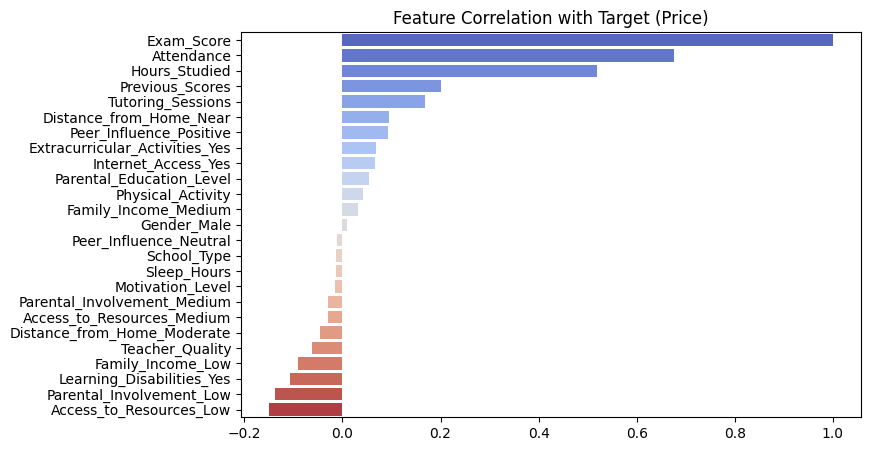

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title("Feature Correlation with Target (Price)")
plt.show()

# **Now we divide input features and Target ceriable X & y**

In [30]:
X = df[['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions']]
y = df['Exam_Score']

# **Train Test Split dataset**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **Scale Data for Model Better understanding**

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Convert again into Pandas Series**

In [34]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [35]:
np.round(X_train.describe(), -1)
np.round(X_test.describe(), 1)

,Attendance,Hours_Studied,Previous_Scores,Tutoring_Sessions
count,1306.0,1306.0,1306.0,1306.0
mean,79.8,20.0,74.8,1.5
std,11.4,5.9,14.0,1.2
min,60.0,2.0,50.0,0.0
25%,70.0,16.0,63.0,1.0
50%,79.0,20.0,75.0,1.0
75%,90.0,24.0,86.0,2.0
max,100.0,37.9,100.0,5.0


In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test_scaled)

In [39]:
print(y_pred.shape)

(1306,)


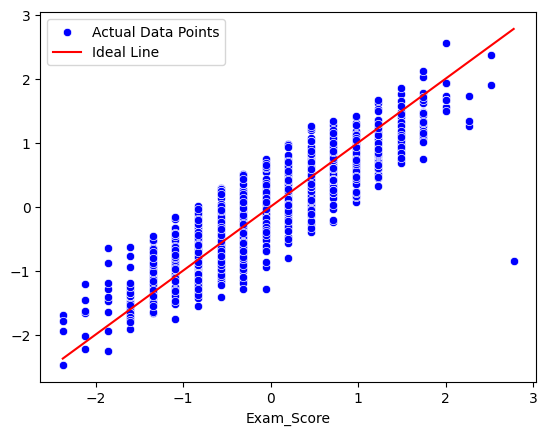

In [40]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [41]:
results = np.column_stack((y_test, y_pred))

In [42]:
# printing the result
print('Actual Values | Predicted Value')
print('-' * 30)

for actual, predicted in results:
    # print(f'{actual:14.2} | {predicted:14.2}')
    pass

Actual Values | Predicted Value
------------------------------


In [43]:
residual = actual - y_pred.reshape(-1)
print(residual)

[-1.56854244 -0.2019315   0.15236051 ... -0.30516949 -1.22578797
 -0.2192434 ]


<Axes: ylabel='Density'>

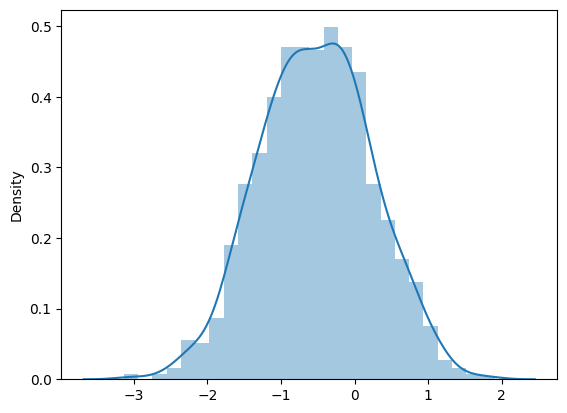

In [44]:
sns.distplot(residual, kde=True)

In [45]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.29664935598793307
Mean Squared Error (MSE): 0.14399850411178677
Root Mean Squared Error (RMSE): 0.3794713482093039
R² Score: 0.7956621258199434


# **Now we apply Decision Tree model for better understanding**

In [46]:
Dt_regressor = DecisionTreeRegressor()
Dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
y_pred = Dt_regressor.predict(X_test)

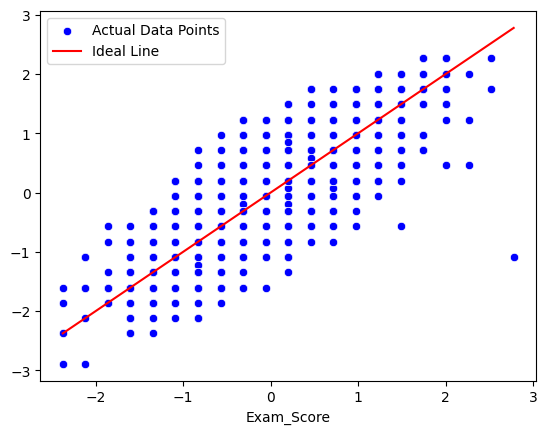

In [48]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [49]:
results = np.column_stack((y_test, y_pred))

In [50]:
# # printing the result
# print('Actual Values | Predicted Value')
# print('-' * 30)

# for actual, predicted in results:
#     print(f'{actual:14.2} | {predicted:14.2}')

In [51]:
residual = actual - y_pred.reshape(-1)
print(residual)

[-2.31817075 -0.77272358 -0.25757453 ... -0.51514905 -1.03029811
 -0.25757453]


<Axes: ylabel='Density'>

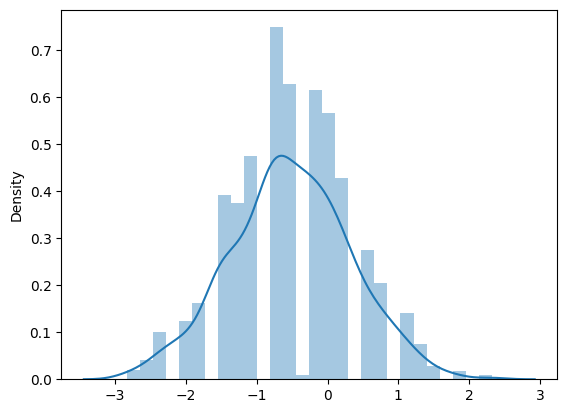

In [52]:
sns.distplot(residual, kde=True)

In [53]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.4424720154305914
Mean Squared Error (MSE): 0.3195185157046032
Root Mean Squared Error (RMSE): 0.5652596887312974
R² Score: 0.5465943576083201
